<a href="https://colab.research.google.com/github/J0n4ta/Transfer-learning-curso-DIO/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8625 - loss: 0.4754 - val_accuracy: 0.9539 - val_loss: 0.1583
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9602 - loss: 0.1355 - val_accuracy: 0.9659 - val_loss: 0.1116
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9743 - loss: 0.0865 - val_accuracy: 0.9681 - val_loss: 0.1063
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9813 - loss: 0.0629 - val_accuracy: 0.9704 - val_loss: 0.1040
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9864 - loss: 0.0454 - val_accuracy: 0.9723 - val_loss: 0.0953
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


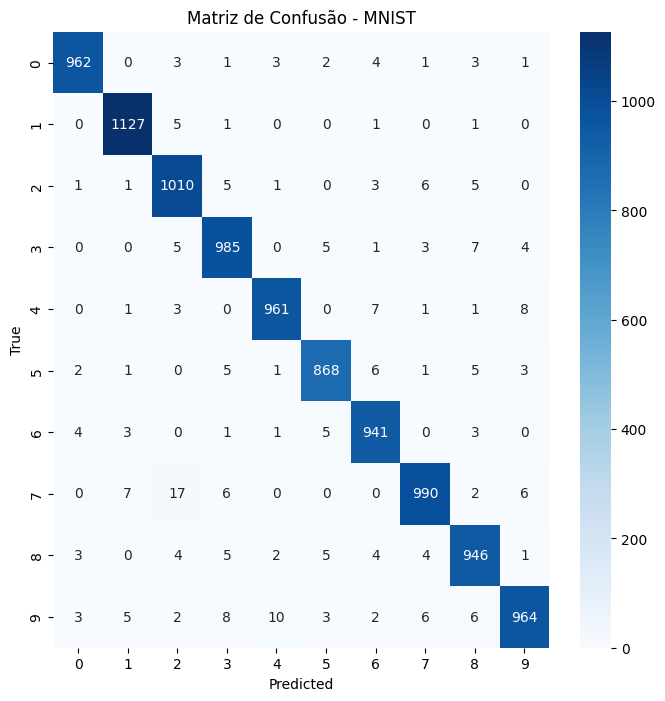

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os pixels para valores entre 0 e 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Criar um modelo simples
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Fazer previsões após todo o treinamento
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão - MNIST')
plt.show()

In [5]:
from sklearn.metrics import (confusion_matrix, classification_report,
                           accuracy_score, precision_score, recall_score,
                           f1_score)

# Calcular especificidade
def calculate_specificity(cm):
    specificities = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)
    return specificities

# Calcular todas as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
specificity = calculate_specificity(cm)

# Calcular suporte
support = np.bincount(y_test, minlength=10)

# Calcular médias weighted
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Exibir resultados gerais por classe APÓS o treinamento
print("\n" + "="*90)
print("MÉTRICAS GERAIS POR CLASSE (APÓS TREINAMENTO)")
print("="*90)
print(f"{'Classe':<8} {'Precisão':<10} {'Sensibilidade':<14} {'Especificidade':<15} {'F1-Score':<10} {'Suporte':<8}")
print("-"*90)

for i in range(10):
    print(f"{i:<8} {precision[i]:<10.4f} {recall[i]:<14.4f} {specificity[i]:<15.4f} {f1[i]:<10.4f} {support[i]:<8}")

print("-"*90)
print(f"{'MÉDIA':<8} {precision_weighted:<10.4f} {recall_weighted:<14.4f} {'-':<15} {f1_weighted:<10.4f} {len(y_test):<8}")
print("="*90)


MÉTRICAS GERAIS POR CLASSE (APÓS TREINAMENTO)
Classe   Precisão   Sensibilidade  Especificidade  F1-Score   Suporte 
------------------------------------------------------------------------------------------
0        0.9867     0.9816         0.9986          0.9841     980     
1        0.9843     0.9930         0.9980          0.9886     1135    
2        0.9628     0.9787         0.9957          0.9707     1032    
3        0.9685     0.9752         0.9964          0.9719     1010    
4        0.9816     0.9786         0.9980          0.9801     982     
5        0.9775     0.9731         0.9978          0.9753     892     
6        0.9711     0.9823         0.9969          0.9766     958     
7        0.9783     0.9630         0.9975          0.9706     1028    
8        0.9663     0.9713         0.9963          0.9688     974     
9        0.9767     0.9554         0.9974          0.9659     1009    
---------------------------------------------------------------------------------